In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
proj_dir = Path("..") / "Data/r77-mini-data-fortnight"
print(proj_dir.joinpath("input"))

data_dir = proj_dir
input_dir = data_dir.joinpath("input")
fixed_input_dir = input_dir.joinpath("fixed")
temporal_input_dir = input_dir.joinpath("temporal")
target_dir = data_dir.joinpath("target")
fixed_target_dir = target_dir.joinpath("fixed")
temporal_target_dir = target_dir.joinpath("temporal")

../Data/r77-mini-data-fortnight/input


In [5]:
files = list(temporal_target_dir.iterdir())

index_dir = Path("..")/"Index"
files_index = list(index_dir.iterdir())
indices = np.load(files_index[0]).squeeze()

#First hour of data
index = indices[0]
tt = np.load(files[index]).squeeze()
tt.shape

(144, 70, 100, 3)

In [6]:
transposed_tt = np.transpose(tt, (0, 2, 3, 1))[:,:,:,:64]

reshaped_tt = transposed_tt.reshape(-1, 3, 64)

reshaped_tt.shape

(14400, 3, 64)

In [7]:
files_fixed = list(fixed_input_dir.iterdir())
#First hour of data
index = indices[0]
fi = np.load(files_fixed[index]).squeeze()
fi.shape

(144, 2)

In [8]:
files_ft = list(fixed_target_dir.iterdir())
#First hour of data
index = indices[0]
ft = np.load(files_ft[index]).squeeze()
ft.shape

(144, 100, 2)

In [9]:
stdev_orog = np.array([np.std(i) for i in ft]).reshape(-1,1)
stdev_orog.shape

(144, 1)

In [11]:
fixed_input = np.hstack((fi, stdev_orog))
fixed_input.shape

(144, 3)

In [12]:
reshaped_fi = np.repeat(fixed_input, 100, axis=0)

In [13]:
lsf = reshaped_fi[:,0]
orog = reshaped_fi[:,1]
stdev_orog = reshaped_fi[:,2]

In [14]:
class_1 = reshaped_fi[(lsf == 0)]
class_2 = reshaped_fi[(lsf == 1) & (orog < 0.06)]
class_3 = reshaped_fi[(lsf == 1) & (orog > 0.06)]
class_4 = reshaped_fi[(lsf < 1) & (lsf > 0) & (orog < 0.03)]
class_5 = reshaped_fi[(lsf < 1) & (lsf > 0) & (orog > 0.03)]

In [15]:
print(f'Class 1 shape: {class_1.shape}')
print(f'Class 2 shape: {class_2.shape}')
print(f'Class 3 shape: {class_3.shape}')
print(f'Class 4 shape: {class_4.shape}')
print(f'Class 4 shape: {class_5.shape}')

Class 1 shape: (4900, 3)
Class 2 shape: (1500, 3)
Class 3 shape: (700, 3)
Class 4 shape: (5700, 3)
Class 4 shape: (1600, 3)


In [16]:
indices1 = np.where((lsf == 0))[0]
trainingdata1 = reshaped_tt[indices1]

indices2 = np.where((lsf == 1) & (orog < 0.06))[0]
trainingdata2 = reshaped_tt[indices2]

indices3 = np.where((lsf == 1) & (orog > 0.06))[0]
trainingdata3 = reshaped_tt[indices3]

indices4 = np.where((lsf < 1) & (lsf > 0) & (orog < 0.03))[0]
trainingdata4 = reshaped_tt[indices4]

indices5 = np.where((lsf < 1) & (lsf > 0) & (orog > 0.03))[0]
trainingdata5 = reshaped_tt[indices5]

In [17]:
print(f'class1 training data {trainingdata1.shape}')
print(f'class2 training data {trainingdata2.shape}')
print(f'class3 training data {trainingdata3.shape}')
print(f'class4 training data {trainingdata4.shape}')
print(f'class5 training data {trainingdata5.shape}')

class1 training data (4900, 3, 64)
class2 training data (1500, 3, 64)
class3 training data (700, 3, 64)
class4 training data (5700, 3, 64)
class5 training data (1600, 3, 64)


In [18]:
random_indices = np.random.choice(trainingdata1.shape[0], 100, replace=False)
trainingdata1 = trainingdata1[random_indices]

random_indices = np.random.choice(trainingdata2.shape[0], 100, replace=False)
trainingdata2 = trainingdata2[random_indices]

random_indices = np.random.choice(trainingdata3.shape[0], 100, replace=False)
trainingdata3 = trainingdata3[random_indices]

random_indices = np.random.choice(trainingdata4.shape[0], 100, replace=False)
trainingdata4 = trainingdata4[random_indices]

random_indices = np.random.choice(trainingdata5.shape[0], 100, replace=False)
trainingdata5 = trainingdata5[random_indices]

In [11]:
sample_dir = Path("Samples_cond_2")
files_sample = list(sample_dir.iterdir())

samples = np.load(files_sample[0]).squeeze()
samples.shape

(5, 4, 3, 64)

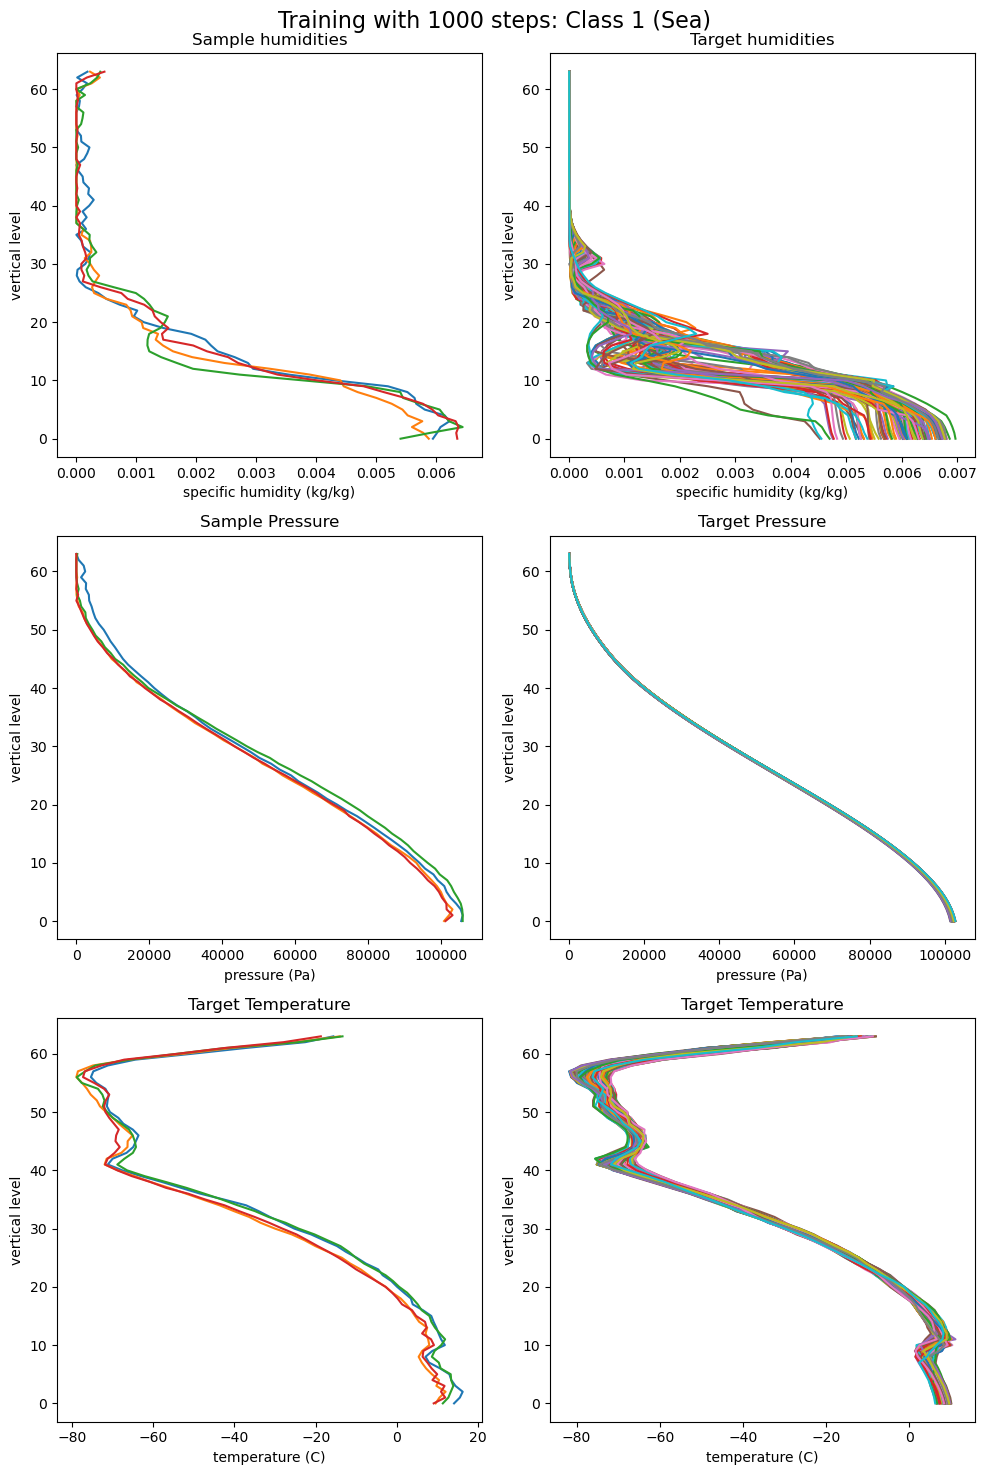

In [20]:

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

#Sample humidities plot
sample_humidity = samples[0, :, 0, :] * 0.025
for i in range(4):
    axs[0,0].plot(sample_humidity[i], np.arange(64))
axs[0,0].set_xlabel("specific humidity (kg/kg)")
axs[0,0].set_ylabel("vertical level")
axs[0,0].set_title("Sample humidities")


# Target humidities plot
target_humidity = trainingdata1[:144, 0, :] * 0.025
for i in range(100):
    axs[0,1].plot(target_humidity[i], np.arange(64))
axs[0,1].set_xlabel("specific humidity (kg/kg)")
axs[0,1].set_ylabel("vertical level")
axs[0,1].set_title("Target humidities")

#Sample pressure plot
sample_pressure = samples[0, :, 1, :] * 106000
for i in range(4):
    axs[1,0].plot(sample_pressure[i], np.arange(64))
axs[1,0].set_xlabel("pressure (Pa)")
axs[1,0].set_ylabel("vertical level")
axs[1,0].set_title("Sample Pressure")

# Target pressure plot
target_pressure = trainingdata1[:144, 1, :] * 106000
for i in range(100):
    axs[1,1].plot(target_pressure[i], np.arange(64))
axs[1,1].set_xlabel("pressure (Pa)")
axs[1,1].set_ylabel("vertical level")
axs[1,1].set_title("Target Pressure")

#Sample temperature plot
sample_temperature = samples[0, :, 2, :]* 180 + 140 -273.15
for i in range(4):
    axs[2,0].plot(sample_temperature[i], np.arange(64))
axs[2,0].set_xlabel("temperature (C)")
axs[2,0].set_ylabel("vertical level")
axs[2,0].set_title("Target Temperature")

# Target pressure plot
target_temperature = trainingdata1[:144, 2, :]* 180 + 140 -273.15
for i in range(100):
    axs[2,1].plot(target_temperature[i], np.arange(64))
axs[2,1].set_xlabel("temperature (C)")
axs[2,1].set_ylabel("vertical level")
axs[2,1].set_title("Target Temperature")

fig.suptitle("Training with 1000 steps: Class 1 (Sea)", fontsize = 16)

plt.tight_layout()
plt.show()

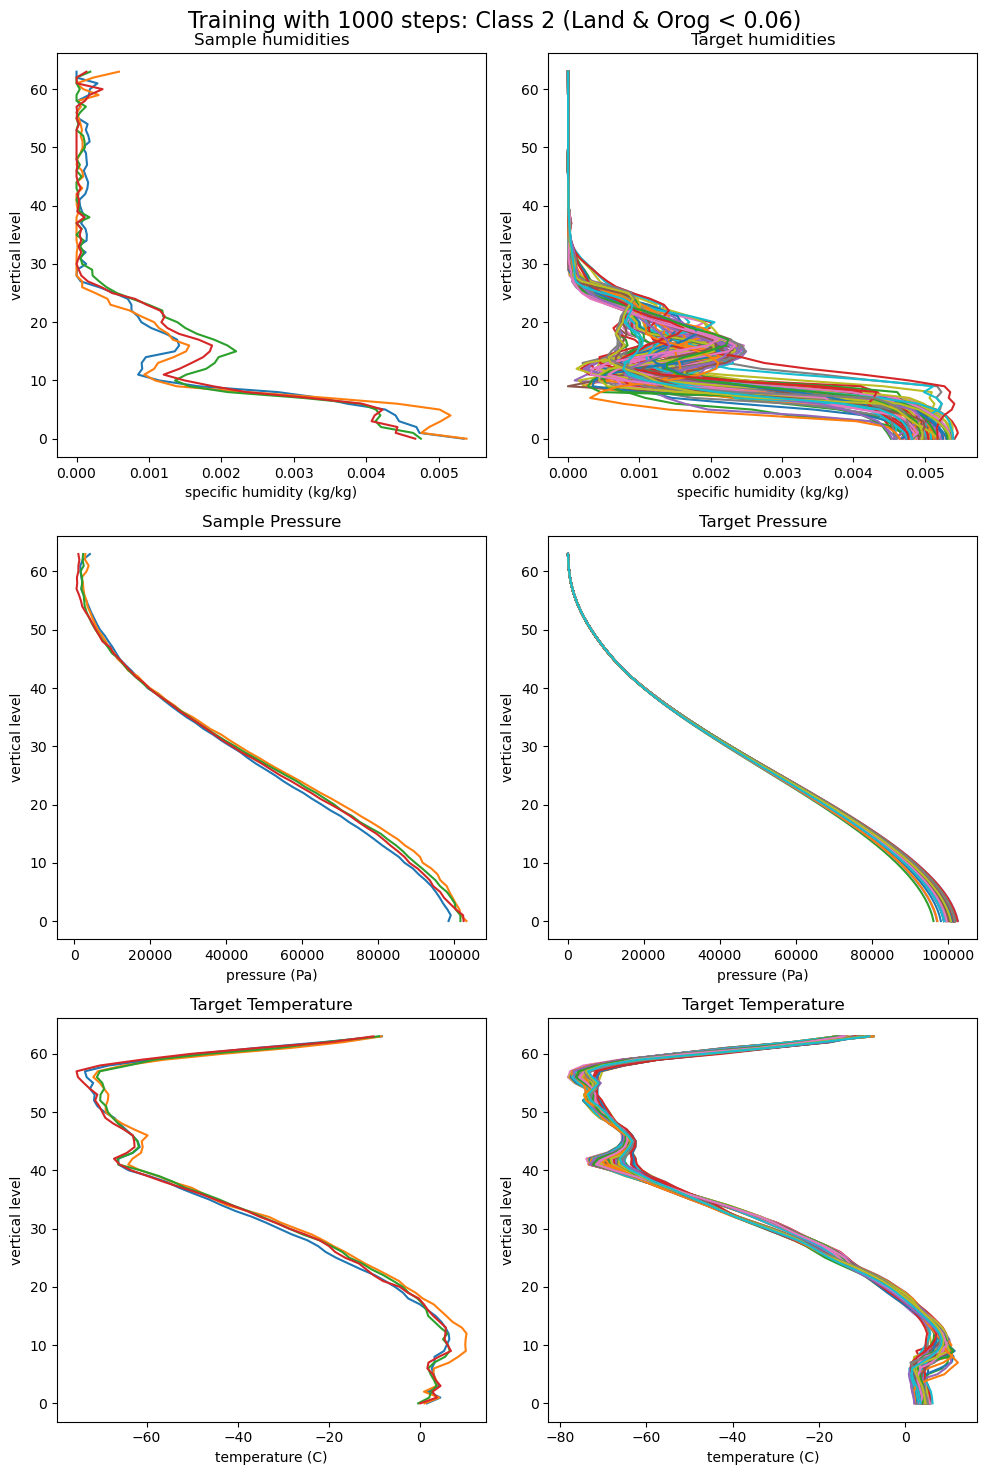

In [21]:

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

#Sample humidities plot
sample_humidity = samples[1, :, 0, :] * 0.025
for i in range(4):
    axs[0,0].plot(sample_humidity[i], np.arange(64))
axs[0,0].set_xlabel("specific humidity (kg/kg)")
axs[0,0].set_ylabel("vertical level")
axs[0,0].set_title("Sample humidities")


# Target humidities plot
target_humidity = trainingdata2[:144, 0, :] * 0.025
for i in range(100):
    axs[0,1].plot(target_humidity[i], np.arange(64))
axs[0,1].set_xlabel("specific humidity (kg/kg)")
axs[0,1].set_ylabel("vertical level")
axs[0,1].set_title("Target humidities")

#Sample pressure plot
sample_pressure = samples[1, :, 1, :] * 106000
for i in range(4):
    axs[1,0].plot(sample_pressure[i], np.arange(64))
axs[1,0].set_xlabel("pressure (Pa)")
axs[1,0].set_ylabel("vertical level")
axs[1,0].set_title("Sample Pressure")

# Target pressure plot
target_pressure = trainingdata2[:144, 1, :] * 106000
for i in range(100):
    axs[1,1].plot(target_pressure[i], np.arange(64))
axs[1,1].set_xlabel("pressure (Pa)")
axs[1,1].set_ylabel("vertical level")
axs[1,1].set_title("Target Pressure")

#Sample temperature plot
sample_temperature = samples[1, :, 2, :]* 180 + 140 -273.15
for i in range(4):
    axs[2,0].plot(sample_temperature[i], np.arange(64))
axs[2,0].set_xlabel("temperature (C)")
axs[2,0].set_ylabel("vertical level")
axs[2,0].set_title("Target Temperature")

# Target pressure plot
target_temperature = trainingdata2[:144, 2, :]* 180 + 140 -273.15
for i in range(100):
    axs[2,1].plot(target_temperature[i], np.arange(64))
axs[2,1].set_xlabel("temperature (C)")
axs[2,1].set_ylabel("vertical level")
axs[2,1].set_title("Target Temperature")

fig.suptitle("Training with 1000 steps: Class 2 (Land & Orog < 0.06)", fontsize = 16)

plt.tight_layout()
plt.show()

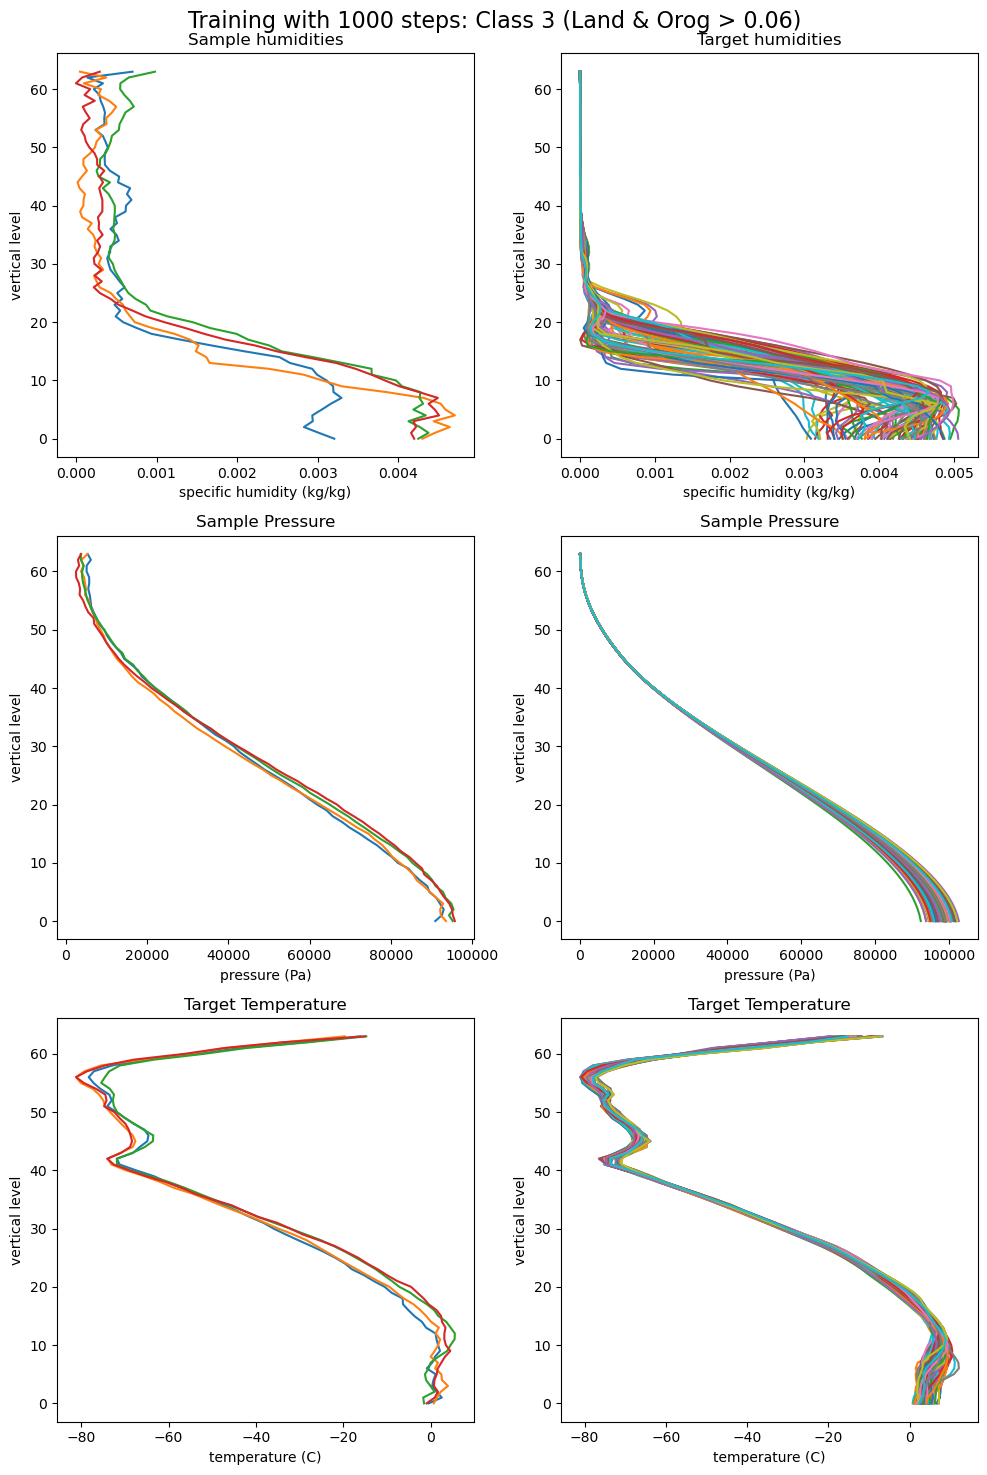

In [22]:

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

#Sample humidities plot
sample_humidity = samples[2, :, 0, :] * 0.025
for i in range(4):
    axs[0,0].plot(sample_humidity[i], np.arange(64))
axs[0,0].set_xlabel("specific humidity (kg/kg)")
axs[0,0].set_ylabel("vertical level")
axs[0,0].set_title("Sample humidities")


# Target humidities plot
target_humidity = trainingdata3[:144, 0, :] * 0.025
for i in range(100):
    axs[0,1].plot(target_humidity[i], np.arange(64))
axs[0,1].set_xlabel("specific humidity (kg/kg)")
axs[0,1].set_ylabel("vertical level")
axs[0,1].set_title("Target humidities")

#Sample pressure plot
sample_pressure = samples[2, :, 1, :] * 106000
for i in range(4):
    axs[1,0].plot(sample_pressure[i], np.arange(64))
axs[1,0].set_xlabel("pressure (Pa)")
axs[1,0].set_ylabel("vertical level")
axs[1,0].set_title("Sample Pressure")

# Target pressure plot
target_pressure = trainingdata3[:144, 1, :] * 106000
for i in range(100):
    axs[1,1].plot(target_pressure[i], np.arange(64))
axs[1,1].set_xlabel("pressure (Pa)")
axs[1,1].set_ylabel("vertical level")
axs[1,1].set_title("Sample Pressure")

#Sample temperature plot
sample_temperature = samples[2, :, 2, :]* 180 + 140 -273.15
for i in range(4):
    axs[2,0].plot(sample_temperature[i], np.arange(64))
axs[2,0].set_xlabel("temperature (C)")
axs[2,0].set_ylabel("vertical level")
axs[2,0].set_title("Target Temperature")

# Target pressure plot
target_temperature = trainingdata3[:144, 2, :]* 180 + 140 -273.15
for i in range(100):
    axs[2,1].plot(target_temperature[i], np.arange(64))
axs[2,1].set_xlabel("temperature (C)")
axs[2,1].set_ylabel("vertical level")
axs[2,1].set_title("Target Temperature")

fig.suptitle("Training with 1000 steps: Class 3 (Land & Orog > 0.06)", fontsize = 16)

plt.tight_layout()
plt.show()

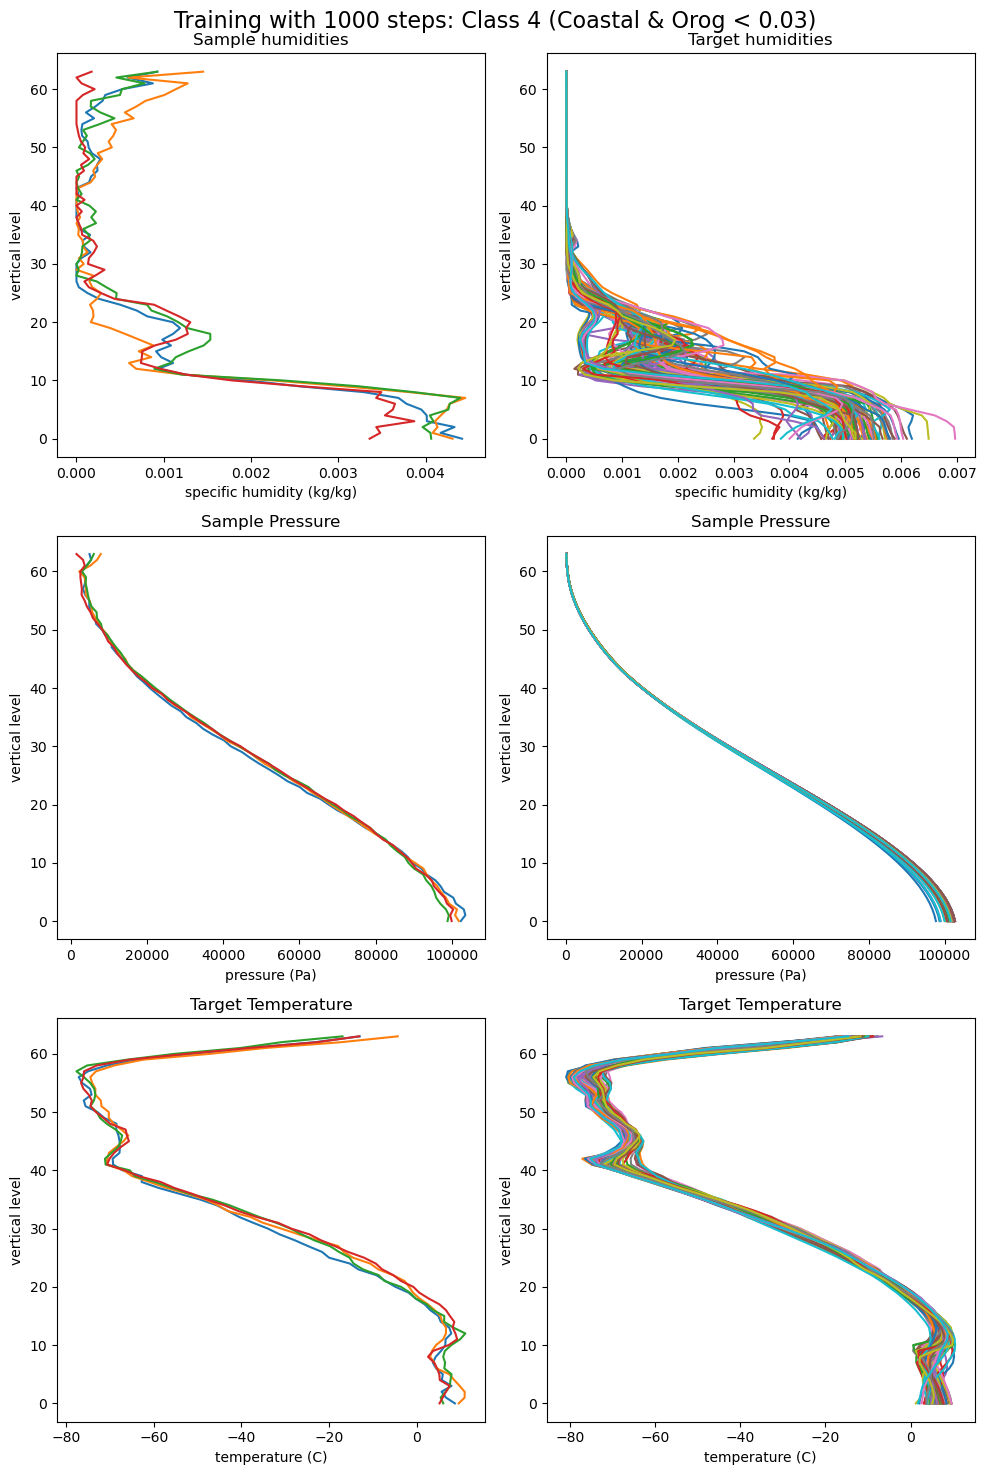

In [23]:

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

#Sample humidities plot
sample_humidity = samples[3, :, 0, :] * 0.025
for i in range(4):
    axs[0,0].plot(sample_humidity[i], np.arange(64))
axs[0,0].set_xlabel("specific humidity (kg/kg)")
axs[0,0].set_ylabel("vertical level")
axs[0,0].set_title("Sample humidities")


# Target humidities plot
target_humidity = trainingdata4[:144, 0, :] * 0.025
for i in range(100):
    axs[0,1].plot(target_humidity[i], np.arange(64))
axs[0,1].set_xlabel("specific humidity (kg/kg)")
axs[0,1].set_ylabel("vertical level")
axs[0,1].set_title("Target humidities")

#Sample pressure plot
sample_pressure = samples[3, :, 1, :] * 106000
for i in range(4):
    axs[1,0].plot(sample_pressure[i], np.arange(64))
axs[1,0].set_xlabel("pressure (Pa)")
axs[1,0].set_ylabel("vertical level")
axs[1,0].set_title("Sample Pressure")

# Target pressure plot
target_pressure = trainingdata4[:144, 1, :] * 106000
for i in range(100):
    axs[1,1].plot(target_pressure[i], np.arange(64))
axs[1,1].set_xlabel("pressure (Pa)")
axs[1,1].set_ylabel("vertical level")
axs[1,1].set_title("Sample Pressure")

#Sample temperature plot
sample_temperature = samples[3, :, 2, :]* 180 + 140 -273.15
for i in range(4):
    axs[2,0].plot(sample_temperature[i], np.arange(64))
axs[2,0].set_xlabel("temperature (C)")
axs[2,0].set_ylabel("vertical level")
axs[2,0].set_title("Target Temperature")

# Target pressure plot
target_temperature = trainingdata4[:144, 2, :]* 180 + 140 -273.15
for i in range(100):
    axs[2,1].plot(target_temperature[i], np.arange(64))
axs[2,1].set_xlabel("temperature (C)")
axs[2,1].set_ylabel("vertical level")
axs[2,1].set_title("Target Temperature")

fig.suptitle("Training with 1000 steps: Class 4 (Coastal & Orog < 0.03)", fontsize = 16)

plt.tight_layout()
plt.show()

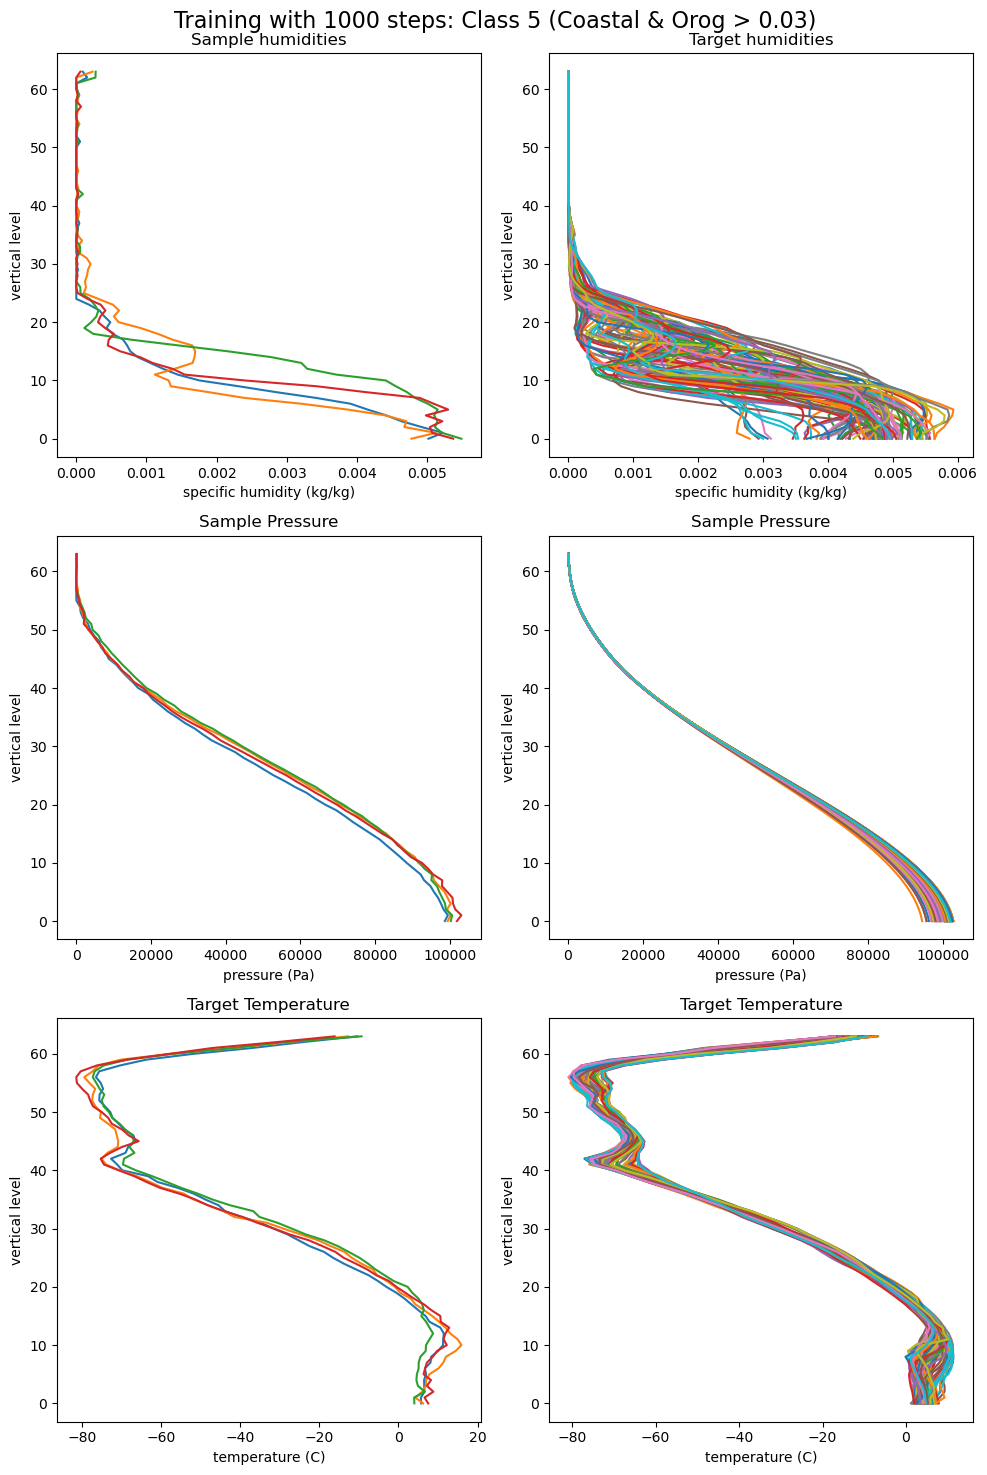

In [24]:

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

#Sample humidities plot
sample_humidity = samples[4, :, 0, :] * 0.025
for i in range(4):
    axs[0,0].plot(sample_humidity[i], np.arange(64))
axs[0,0].set_xlabel("specific humidity (kg/kg)")
axs[0,0].set_ylabel("vertical level")
axs[0,0].set_title("Sample humidities")


# Target humidities plot
target_humidity = trainingdata5[:144, 0, :] * 0.025
for i in range(100):
    axs[0,1].plot(target_humidity[i], np.arange(64))
axs[0,1].set_xlabel("specific humidity (kg/kg)")
axs[0,1].set_ylabel("vertical level")
axs[0,1].set_title("Target humidities")

#Sample pressure plot
sample_pressure = samples[4, :, 1, :] * 106000
for i in range(4):
    axs[1,0].plot(sample_pressure[i], np.arange(64))
axs[1,0].set_xlabel("pressure (Pa)")
axs[1,0].set_ylabel("vertical level")
axs[1,0].set_title("Sample Pressure")

# Target pressure plot
target_pressure = trainingdata5[:144, 1, :] * 106000
for i in range(100):
    axs[1,1].plot(target_pressure[i], np.arange(64))
axs[1,1].set_xlabel("pressure (Pa)")
axs[1,1].set_ylabel("vertical level")
axs[1,1].set_title("Sample Pressure")

#Sample temperature plot
sample_temperature = samples[4, :, 2, :]* 180 + 140 -273.15
for i in range(4):
    axs[2,0].plot(sample_temperature[i], np.arange(64))
axs[2,0].set_xlabel("temperature (C)")
axs[2,0].set_ylabel("vertical level")
axs[2,0].set_title("Target Temperature")

# Target pressure plot
target_temperature = trainingdata5[:144, 2, :]* 180 + 140 -273.15
for i in range(100):
    axs[2,1].plot(target_temperature[i], np.arange(64))
axs[2,1].set_xlabel("temperature (C)")
axs[2,1].set_ylabel("vertical level")
axs[2,1].set_title("Target Temperature")

fig.suptitle("Training with 1000 steps: Class 5 (Coastal & Orog > 0.03)", fontsize = 16)

plt.tight_layout()
plt.show()

In [25]:
sample_dir = Path("Samples_cond_1")
files_sample = list(sample_dir.iterdir())

samples = np.load(files_sample[0]).squeeze()
samples.shape

(5, 4, 3, 64)

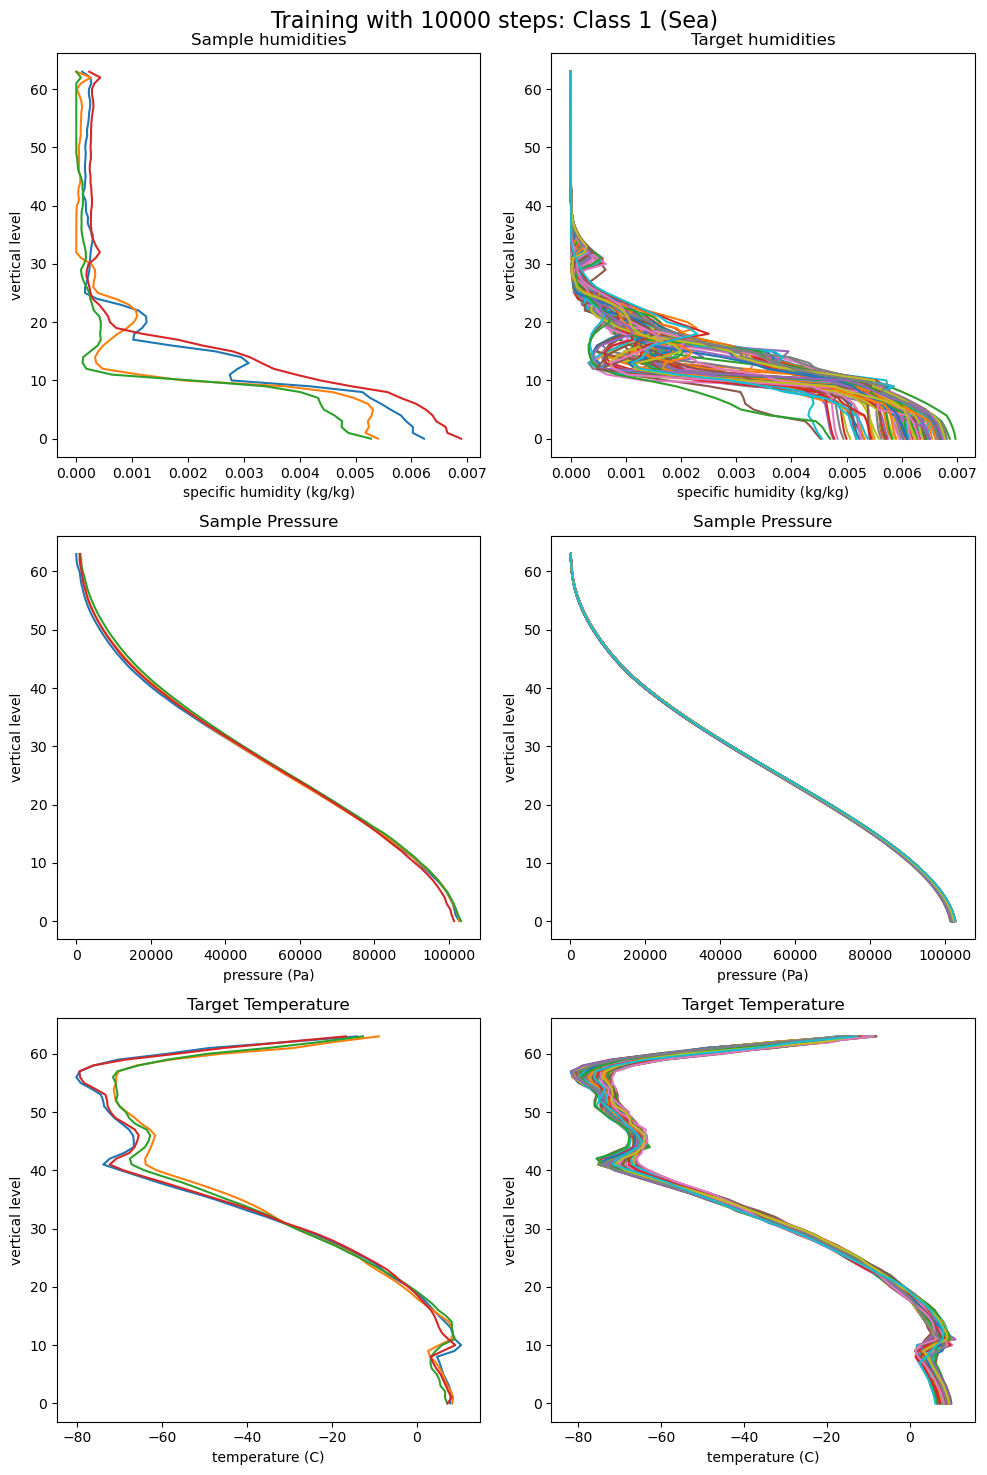

In [26]:

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

#Sample humidities plot
sample_humidity = samples[0, :, 0, :] * 0.025
for i in range(4):
    axs[0,0].plot(sample_humidity[i], np.arange(64))
axs[0,0].set_xlabel("specific humidity (kg/kg)")
axs[0,0].set_ylabel("vertical level")
axs[0,0].set_title("Sample humidities")


# Target humidities plot
target_humidity = trainingdata1[:144, 0, :] * 0.025
for i in range(100):
    axs[0,1].plot(target_humidity[i], np.arange(64))
axs[0,1].set_xlabel("specific humidity (kg/kg)")
axs[0,1].set_ylabel("vertical level")
axs[0,1].set_title("Target humidities")

#Sample pressure plot
sample_pressure = samples[0, :, 1, :] * 106000
for i in range(4):
    axs[1,0].plot(sample_pressure[i], np.arange(64))
axs[1,0].set_xlabel("pressure (Pa)")
axs[1,0].set_ylabel("vertical level")
axs[1,0].set_title("Sample Pressure")

# Target pressure plot
target_pressure = trainingdata1[:144, 1, :] * 106000
for i in range(100):
    axs[1,1].plot(target_pressure[i], np.arange(64))
axs[1,1].set_xlabel("pressure (Pa)")
axs[1,1].set_ylabel("vertical level")
axs[1,1].set_title("Sample Pressure")

#Sample temperature plot
sample_temperature = samples[0, :, 2, :]* 180 + 140 -273.15
for i in range(4):
    axs[2,0].plot(sample_temperature[i], np.arange(64))
axs[2,0].set_xlabel("temperature (C)")
axs[2,0].set_ylabel("vertical level")
axs[2,0].set_title("Target Temperature")

# Target pressure plot
target_temperature = trainingdata1[:144, 2, :]* 180 + 140 -273.15
for i in range(100):
    axs[2,1].plot(target_temperature[i], np.arange(64))
axs[2,1].set_xlabel("temperature (C)")
axs[2,1].set_ylabel("vertical level")
axs[2,1].set_title("Target Temperature")

fig.suptitle("Training with 10000 steps: Class 1 (Sea)", fontsize = 16)

plt.tight_layout()
plt.show()

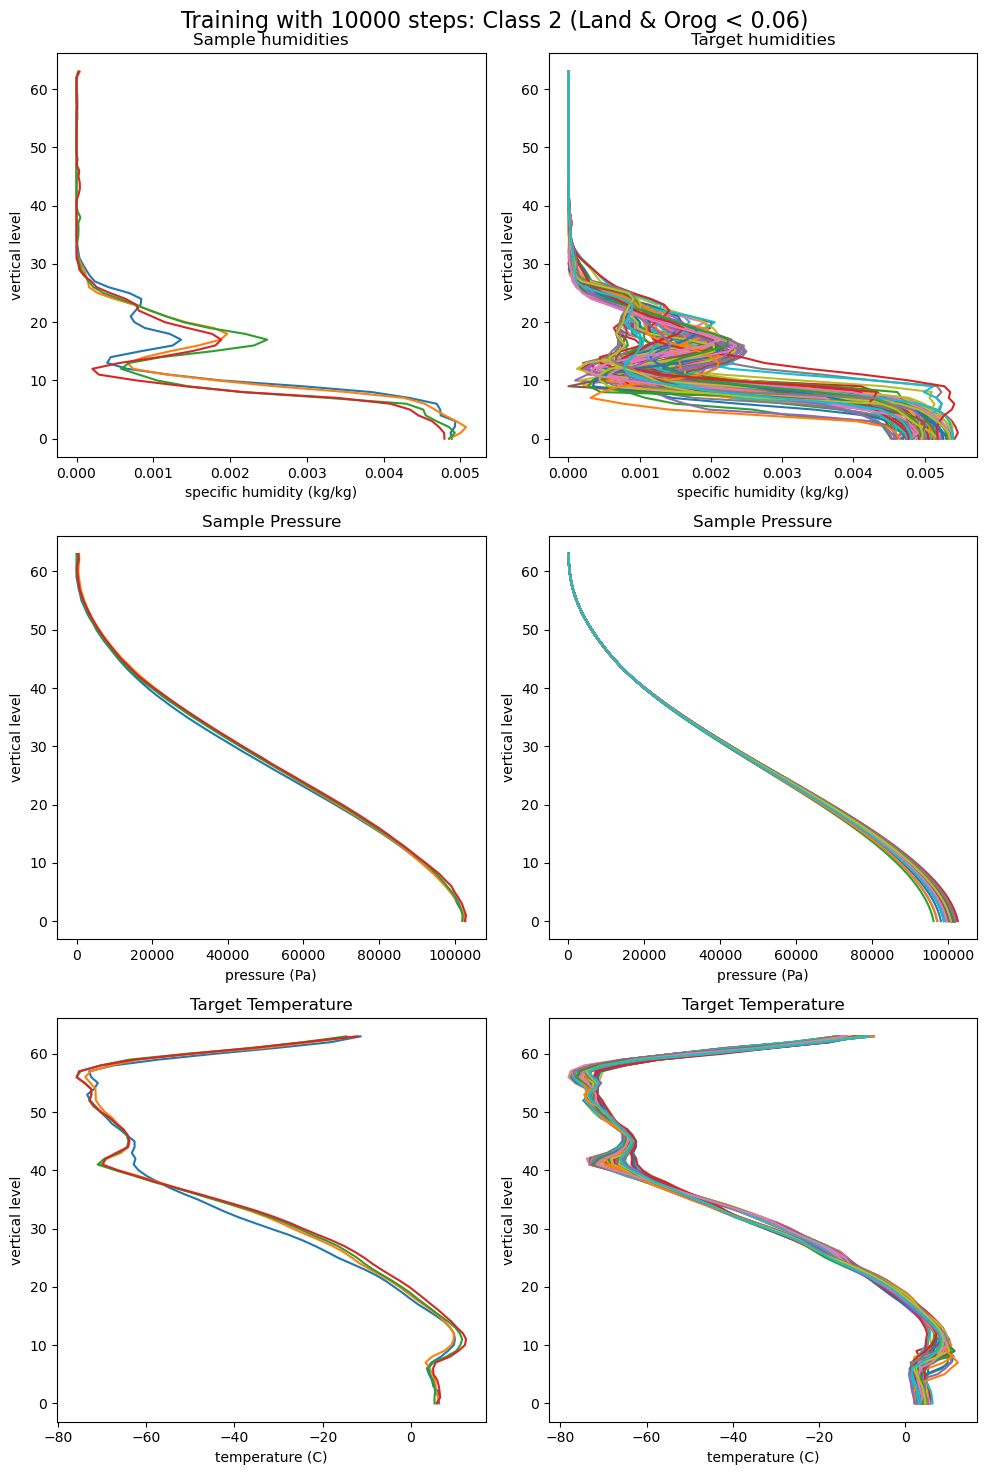

In [27]:

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

#Sample humidities plot
sample_humidity = samples[1, :, 0, :] * 0.025
for i in range(4):
    axs[0,0].plot(sample_humidity[i], np.arange(64))
axs[0,0].set_xlabel("specific humidity (kg/kg)")
axs[0,0].set_ylabel("vertical level")
axs[0,0].set_title("Sample humidities")


# Target humidities plot
target_humidity = trainingdata2[:144, 0, :] * 0.025
for i in range(100):
    axs[0,1].plot(target_humidity[i], np.arange(64))
axs[0,1].set_xlabel("specific humidity (kg/kg)")
axs[0,1].set_ylabel("vertical level")
axs[0,1].set_title("Target humidities")

#Sample pressure plot
sample_pressure = samples[1, :, 1, :] * 106000
for i in range(4):
    axs[1,0].plot(sample_pressure[i], np.arange(64))
axs[1,0].set_xlabel("pressure (Pa)")
axs[1,0].set_ylabel("vertical level")
axs[1,0].set_title("Sample Pressure")

# Target pressure plot
target_pressure = trainingdata2[:144, 1, :] * 106000
for i in range(100):
    axs[1,1].plot(target_pressure[i], np.arange(64))
axs[1,1].set_xlabel("pressure (Pa)")
axs[1,1].set_ylabel("vertical level")
axs[1,1].set_title("Sample Pressure")

#Sample temperature plot
sample_temperature = samples[1, :, 2, :]* 180 + 140 -273.15
for i in range(4):
    axs[2,0].plot(sample_temperature[i], np.arange(64))
axs[2,0].set_xlabel("temperature (C)")
axs[2,0].set_ylabel("vertical level")
axs[2,0].set_title("Target Temperature")

# Target pressure plot
target_temperature = trainingdata2[:144, 2, :]* 180 + 140 -273.15
for i in range(100):
    axs[2,1].plot(target_temperature[i], np.arange(64))
axs[2,1].set_xlabel("temperature (C)")
axs[2,1].set_ylabel("vertical level")
axs[2,1].set_title("Target Temperature")

fig.suptitle("Training with 10000 steps: Class 2 (Land & Orog < 0.06)", fontsize = 16)

plt.tight_layout()
plt.show()

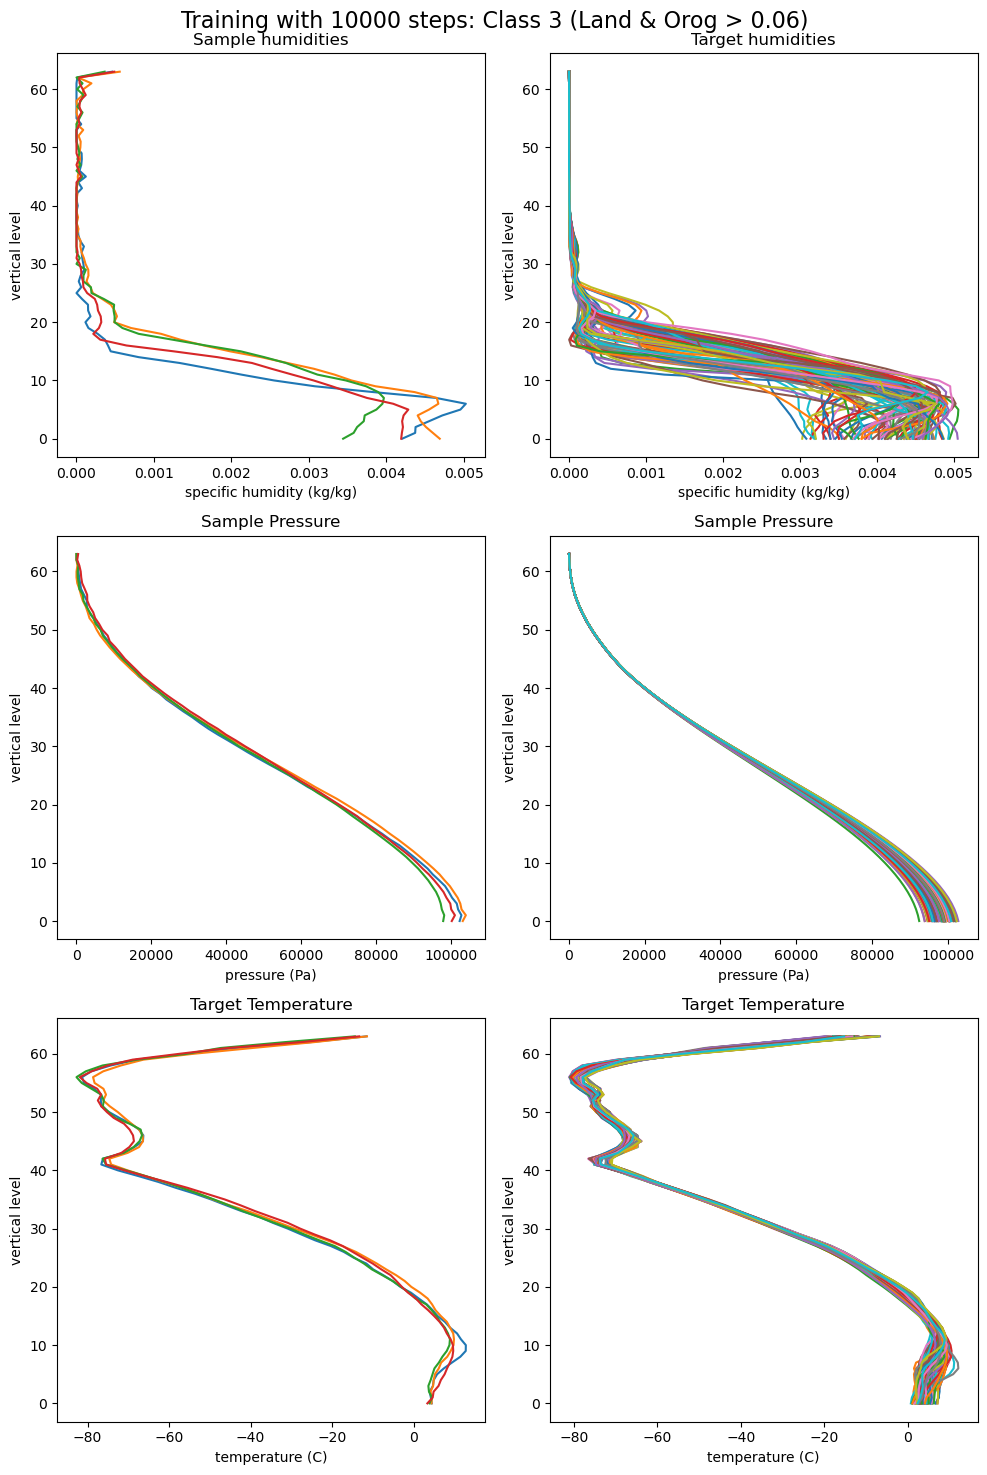

In [28]:

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

#Sample humidities plot
sample_humidity = samples[2, :, 0, :] * 0.025
for i in range(4):
    axs[0,0].plot(sample_humidity[i], np.arange(64))
axs[0,0].set_xlabel("specific humidity (kg/kg)")
axs[0,0].set_ylabel("vertical level")
axs[0,0].set_title("Sample humidities")


# Target humidities plot
target_humidity = trainingdata3[:144, 0, :] * 0.025
for i in range(100):
    axs[0,1].plot(target_humidity[i], np.arange(64))
axs[0,1].set_xlabel("specific humidity (kg/kg)")
axs[0,1].set_ylabel("vertical level")
axs[0,1].set_title("Target humidities")

#Sample pressure plot
sample_pressure = samples[2, :, 1, :] * 106000
for i in range(4):
    axs[1,0].plot(sample_pressure[i], np.arange(64))
axs[1,0].set_xlabel("pressure (Pa)")
axs[1,0].set_ylabel("vertical level")
axs[1,0].set_title("Sample Pressure")

# Target pressure plot
target_pressure = trainingdata3[:144, 1, :] * 106000
for i in range(100):
    axs[1,1].plot(target_pressure[i], np.arange(64))
axs[1,1].set_xlabel("pressure (Pa)")
axs[1,1].set_ylabel("vertical level")
axs[1,1].set_title("Sample Pressure")

#Sample temperature plot
sample_temperature = samples[2, :, 2, :]* 180 + 140 -273.15
for i in range(4):
    axs[2,0].plot(sample_temperature[i], np.arange(64))
axs[2,0].set_xlabel("temperature (C)")
axs[2,0].set_ylabel("vertical level")
axs[2,0].set_title("Target Temperature")

# Target pressure plot
target_temperature = trainingdata3[:144, 2, :]* 180 + 140 -273.15
for i in range(100):
    axs[2,1].plot(target_temperature[i], np.arange(64))
axs[2,1].set_xlabel("temperature (C)")
axs[2,1].set_ylabel("vertical level")
axs[2,1].set_title("Target Temperature")

fig.suptitle("Training with 10000 steps: Class 3 (Land & Orog > 0.06)", fontsize = 16)

plt.tight_layout()
plt.show()

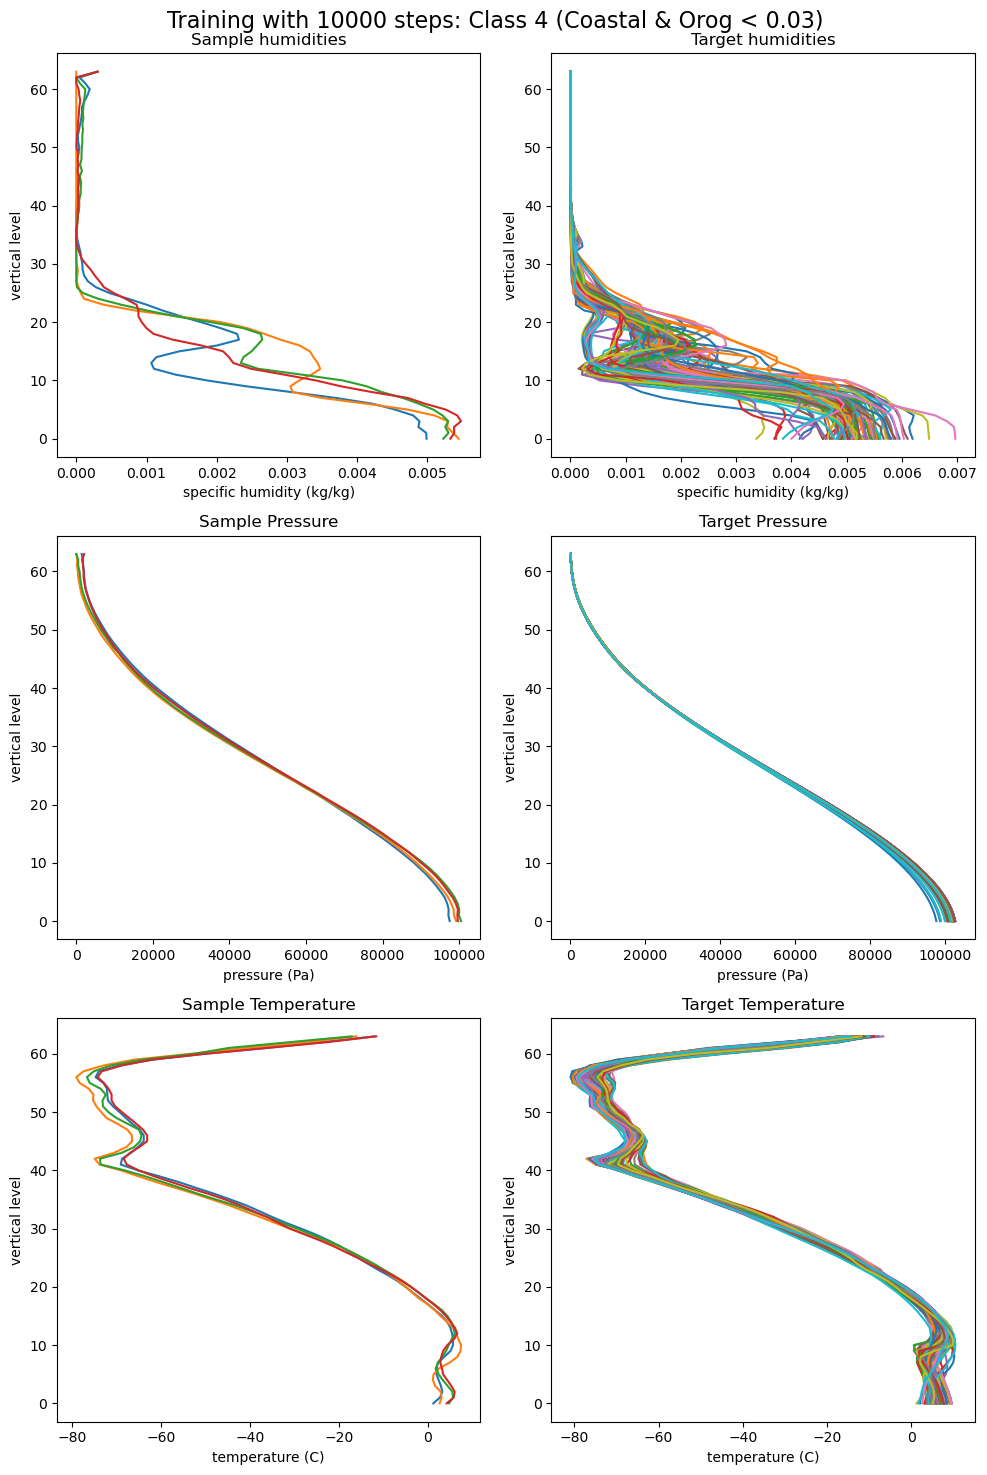

In [29]:

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

#Sample humidities plot
sample_humidity = samples[3, :, 0, :] * 0.025
for i in range(4):
    axs[0,0].plot(sample_humidity[i], np.arange(64))
axs[0,0].set_xlabel("specific humidity (kg/kg)")
axs[0,0].set_ylabel("vertical level")
axs[0,0].set_title("Sample humidities")


# Target humidities plot
target_humidity = trainingdata4[:144, 0, :] * 0.025
for i in range(100):
    axs[0,1].plot(target_humidity[i], np.arange(64))
axs[0,1].set_xlabel("specific humidity (kg/kg)")
axs[0,1].set_ylabel("vertical level")
axs[0,1].set_title("Target humidities")

#Sample pressure plot
sample_pressure = samples[3, :, 1, :] * 106000
for i in range(4):
    axs[1,0].plot(sample_pressure[i], np.arange(64))
axs[1,0].set_xlabel("pressure (Pa)")
axs[1,0].set_ylabel("vertical level")
axs[1,0].set_title("Sample Pressure")

# Target pressure plot
target_pressure = trainingdata4[:144, 1, :] * 106000
for i in range(100):
    axs[1,1].plot(target_pressure[i], np.arange(64))
axs[1,1].set_xlabel("pressure (Pa)")
axs[1,1].set_ylabel("vertical level")
axs[1,1].set_title("Target Pressure")

#Sample temperature plot
sample_temperature = samples[3, :, 2, :]* 180 + 140 -273.15
for i in range(4):
    axs[2,0].plot(sample_temperature[i], np.arange(64))
axs[2,0].set_xlabel("temperature (C)")
axs[2,0].set_ylabel("vertical level")
axs[2,0].set_title("Sample Temperature")

# Target pressure plotc
target_temperature = trainingdata4[:144, 2, :]* 180 + 140 -273.15
for i in range(100):
    axs[2,1].plot(target_temperature[i], np.arange(64))
axs[2,1].set_xlabel("temperature (C)")
axs[2,1].set_ylabel("vertical level")
axs[2,1].set_title("Target Temperature")

fig.suptitle("Training with 10000 steps: Class 4 (Coastal & Orog < 0.03)", fontsize = 16)

plt.tight_layout()
plt.show()

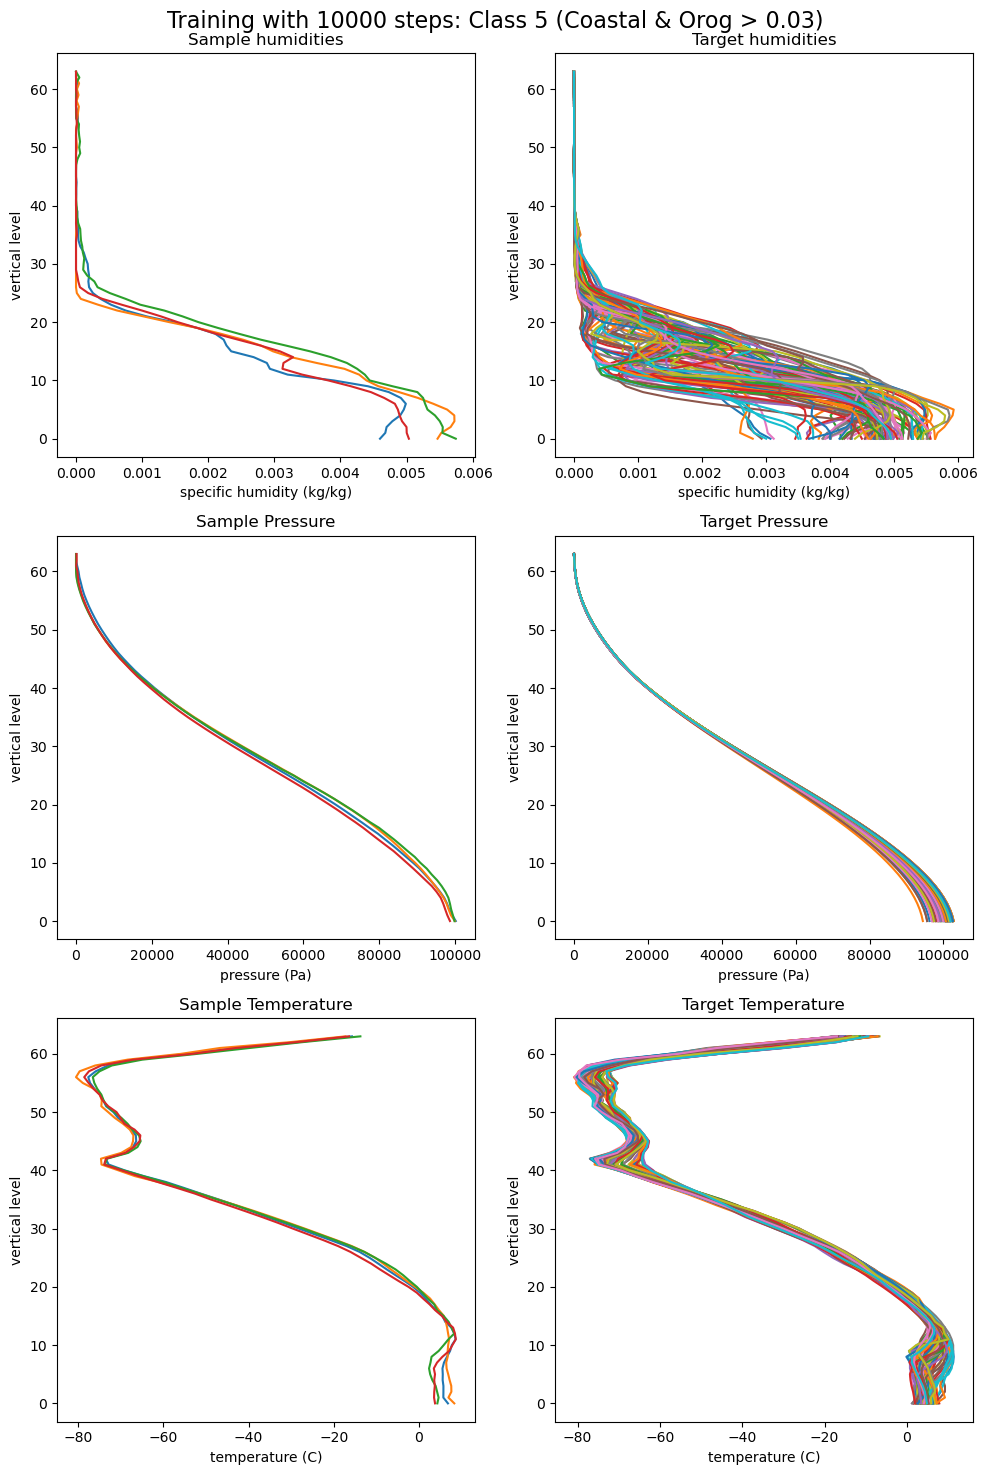

In [30]:

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

#Sample humidities plot
sample_humidity = samples[4, :, 0, :] * 0.025
for i in range(4):
    axs[0,0].plot(sample_humidity[i], np.arange(64))
axs[0,0].set_xlabel("specific humidity (kg/kg)")
axs[0,0].set_ylabel("vertical level")
axs[0,0].set_title("Sample humidities")


# Target humidities plot
target_humidity = trainingdata5[:144, 0, :] * 0.025
for i in range(100):
    axs[0,1].plot(target_humidity[i], np.arange(64))
axs[0,1].set_xlabel("specific humidity (kg/kg)")
axs[0,1].set_ylabel("vertical level")
axs[0,1].set_title("Target humidities")

#Sample pressure plot
sample_pressure = samples[4, :, 1, :] * 106000
for i in range(4):
    axs[1,0].plot(sample_pressure[i], np.arange(64))
axs[1,0].set_xlabel("pressure (Pa)")
axs[1,0].set_ylabel("vertical level")
axs[1,0].set_title("Sample Pressure")

# Target pressure plot
target_pressure = trainingdata5[:144, 1, :] * 106000
for i in range(100):
    axs[1,1].plot(target_pressure[i], np.arange(64))
axs[1,1].set_xlabel("pressure (Pa)")
axs[1,1].set_ylabel("vertical level")
axs[1,1].set_title("Target Pressure")

#Sample temperature plot
sample_temperature = samples[4, :, 2, :]* 180 + 140 -273.15
for i in range(4):
    axs[2,0].plot(sample_temperature[i], np.arange(64))
axs[2,0].set_xlabel("temperature (C)")
axs[2,0].set_ylabel("vertical level")
axs[2,0].set_title("Sample Temperature")

# Target pressure plot
target_temperature = trainingdata5[:144, 2, :]* 180 + 140 -273.15
for i in range(100):
    axs[2,1].plot(target_temperature[i], np.arange(64))
axs[2,1].set_xlabel("temperature (C)")
axs[2,1].set_ylabel("vertical level")
axs[2,1].set_title("Target Temperature")

fig.suptitle("Training with 10000 steps: Class 5 (Coastal & Orog > 0.03)", fontsize = 16)

plt.tight_layout()
plt.show()

In [51]:
sample_dir = Path("Samples_cond_3")
files_sample = list(sample_dir.iterdir())

samples = np.load(files_sample[0]).squeeze()
samples.shape

(5, 4, 3, 64)

In [52]:
indices1 = np.where((lsf == 0))[0]
trainingdata1 = reshaped_tt[indices1]

indices2 = np.where((lsf == 1) & (orog < 0.06))[0]
trainingdata2 = reshaped_tt[indices2]

indices3 = np.where((lsf == 1) & (orog > 0.06))[0]
trainingdata3 = reshaped_tt[indices3]

indices4 = np.where((lsf < 1) & (lsf > 0) & (orog < 0.03))[0]
trainingdata4 = reshaped_tt[indices4]

indices5 = np.where((lsf < 1) & (lsf > 0) & (orog > 0.03))[0]
trainingdata5 = reshaped_tt[indices5]

In [53]:
random_indices = np.random.choice(trainingdata1.shape[0], 100, replace=False)
trainingdata1 = trainingdata1[random_indices]

random_indices = np.random.choice(trainingdata2.shape[0], 100, replace=False)
trainingdata2 = trainingdata2[random_indices]

random_indices = np.random.choice(trainingdata3.shape[0], 100, replace=False)
trainingdata3 = trainingdata3[random_indices]

random_indices = np.random.choice(trainingdata4.shape[0], 100, replace=False)
trainingdata4 = trainingdata4[random_indices]

random_indices = np.random.choice(trainingdata5.shape[0], 100, replace=False)
trainingdata5 = trainingdata5[random_indices]

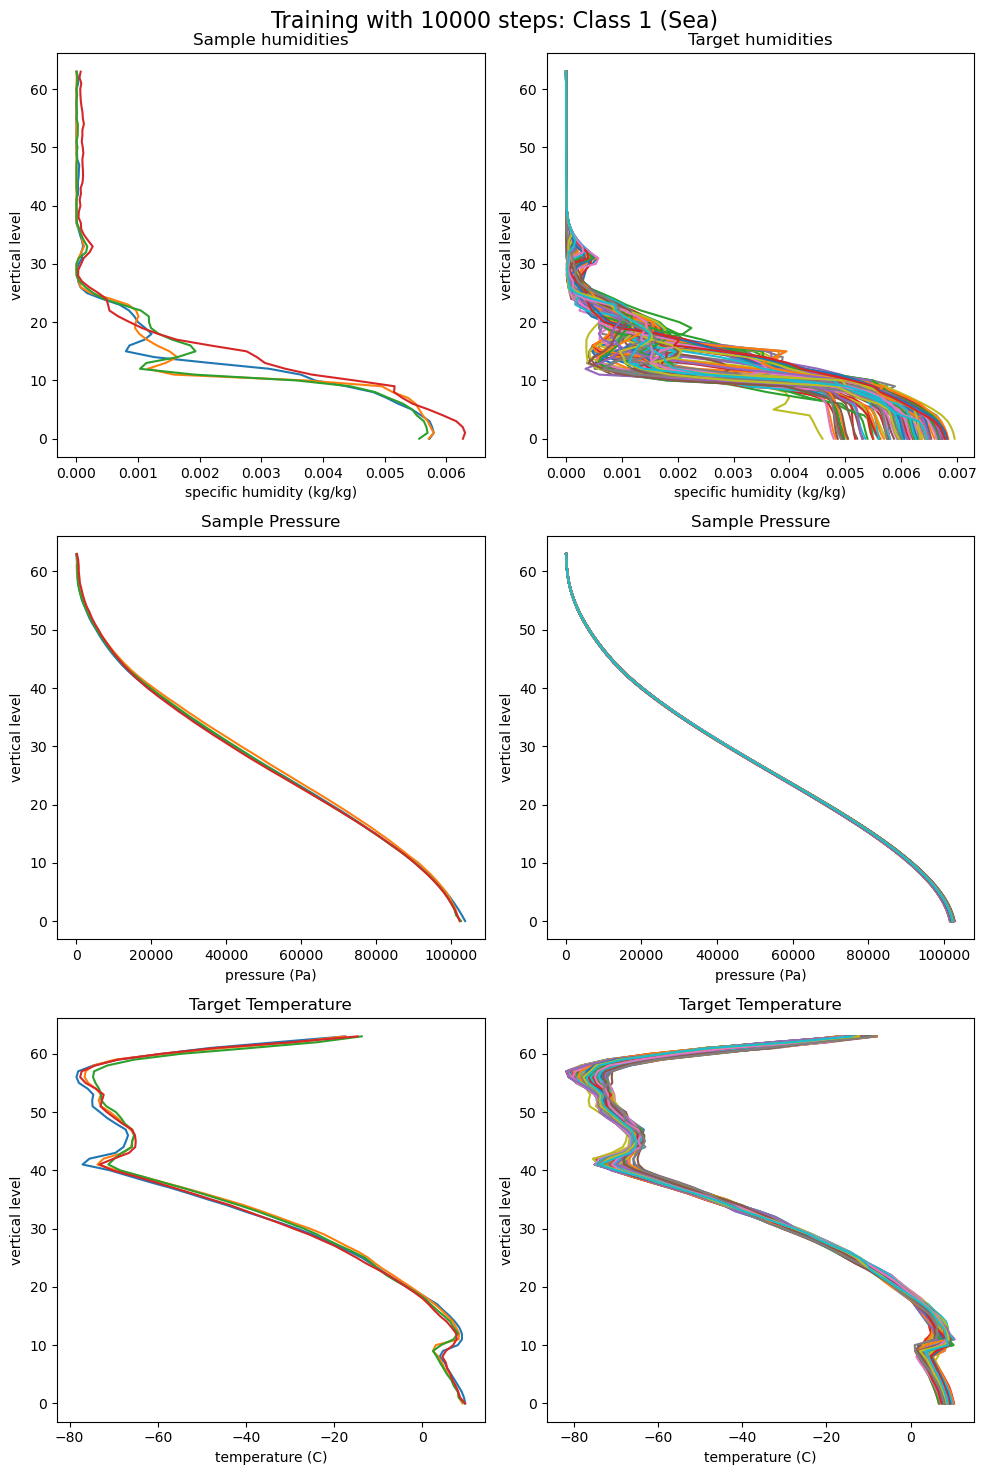

In [54]:

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

#Sample humidities plot
sample_humidity = samples[0, :, 0, :] * 0.025
for i in range(4):
    axs[0,0].plot(sample_humidity[i], np.arange(64))
axs[0,0].set_xlabel("specific humidity (kg/kg)")
axs[0,0].set_ylabel("vertical level")
axs[0,0].set_title("Sample humidities")


# Target humidities plot
target_humidity = trainingdata1[:144, 0, :] * 0.025
for i in range(100):
    axs[0,1].plot(target_humidity[i], np.arange(64))
axs[0,1].set_xlabel("specific humidity (kg/kg)")
axs[0,1].set_ylabel("vertical level")
axs[0,1].set_title("Target humidities")

#Sample pressure plot
sample_pressure = samples[0, :, 1, :] * 106000
for i in range(4):
    axs[1,0].plot(sample_pressure[i], np.arange(64))
axs[1,0].set_xlabel("pressure (Pa)")
axs[1,0].set_ylabel("vertical level")
axs[1,0].set_title("Sample Pressure")

# Target pressure plot
target_pressure = trainingdata1[:144, 1, :] * 106000
for i in range(100):
    axs[1,1].plot(target_pressure[i], np.arange(64))
axs[1,1].set_xlabel("pressure (Pa)")
axs[1,1].set_ylabel("vertical level")
axs[1,1].set_title("Sample Pressure")

#Sample temperature plot
sample_temperature = samples[0, :, 2, :]* 180 + 140 -273.15
for i in range(4):
    axs[2,0].plot(sample_temperature[i], np.arange(64))
axs[2,0].set_xlabel("temperature (C)")
axs[2,0].set_ylabel("vertical level")
axs[2,0].set_title("Target Temperature")

# Target pressure plot
target_temperature = trainingdata1[:144, 2, :]* 180 + 140 -273.15
for i in range(100):
    axs[2,1].plot(target_temperature[i], np.arange(64))
axs[2,1].set_xlabel("temperature (C)")
axs[2,1].set_ylabel("vertical level")
axs[2,1].set_title("Target Temperature")

fig.suptitle("Training with 10000 steps: Class 1 (Sea)", fontsize = 16)

plt.tight_layout()
plt.show()

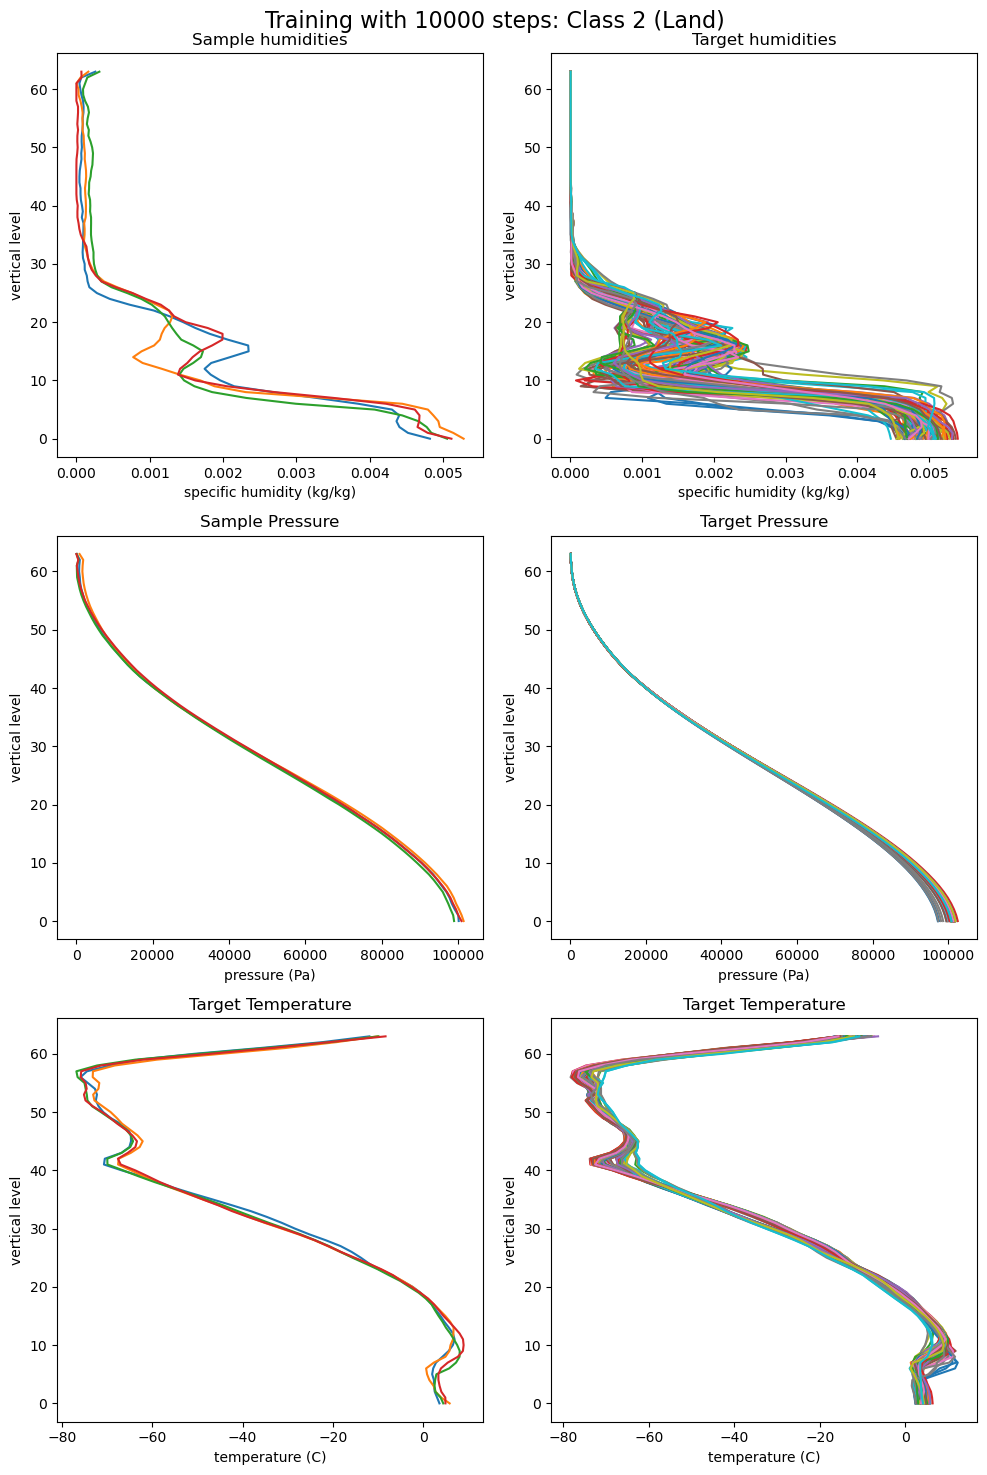

In [58]:

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

#Sample humidities plot
sample_humidity = samples[1, :, 0, :] * 0.025
for i in range(4):
    axs[0,0].plot(sample_humidity[i], np.arange(64))
axs[0,0].set_xlabel("specific humidity (kg/kg)")
axs[0,0].set_ylabel("vertical level")
axs[0,0].set_title("Sample humidities")


# Target humidities plot
target_humidity = trainingdata2[:144, 0, :] * 0.025
for i in range(100):
    axs[0,1].plot(target_humidity[i], np.arange(64))
axs[0,1].set_xlabel("specific humidity (kg/kg)")
axs[0,1].set_ylabel("vertical level")
axs[0,1].set_title("Target humidities")

#Sample pressure plot
sample_pressure = samples[1, :, 1, :] * 106000
for i in range(4):
    axs[1,0].plot(sample_pressure[i], np.arange(64))
axs[1,0].set_xlabel("pressure (Pa)")
axs[1,0].set_ylabel("vertical level")
axs[1,0].set_title("Sample Pressure")

# Target pressure plot
target_pressure = trainingdata2[:144, 1, :] * 106000
for i in range(100):
    axs[1,1].plot(target_pressure[i], np.arange(64))
axs[1,1].set_xlabel("pressure (Pa)")
axs[1,1].set_ylabel("vertical level")
axs[1,1].set_title("Target Pressure")

#Sample temperature plot
sample_temperature = samples[1, :, 2, :]* 180 + 140 -273.15
for i in range(4):
    axs[2,0].plot(sample_temperature[i], np.arange(64))
axs[2,0].set_xlabel("temperature (C)")
axs[2,0].set_ylabel("vertical level")
axs[2,0].set_title("Target Temperature")

# Target pressure plot
target_temperature = trainingdata2[:144, 2, :]* 180 + 140 -273.15
for i in range(100):
    axs[2,1].plot(target_temperature[i], np.arange(64))
axs[2,1].set_xlabel("temperature (C)")
axs[2,1].set_ylabel("vertical level")
axs[2,1].set_title("Target Temperature")

fig.suptitle("Training with 10000 steps: Class 2 (Land)", fontsize = 16)

plt.tight_layout()
plt.show()

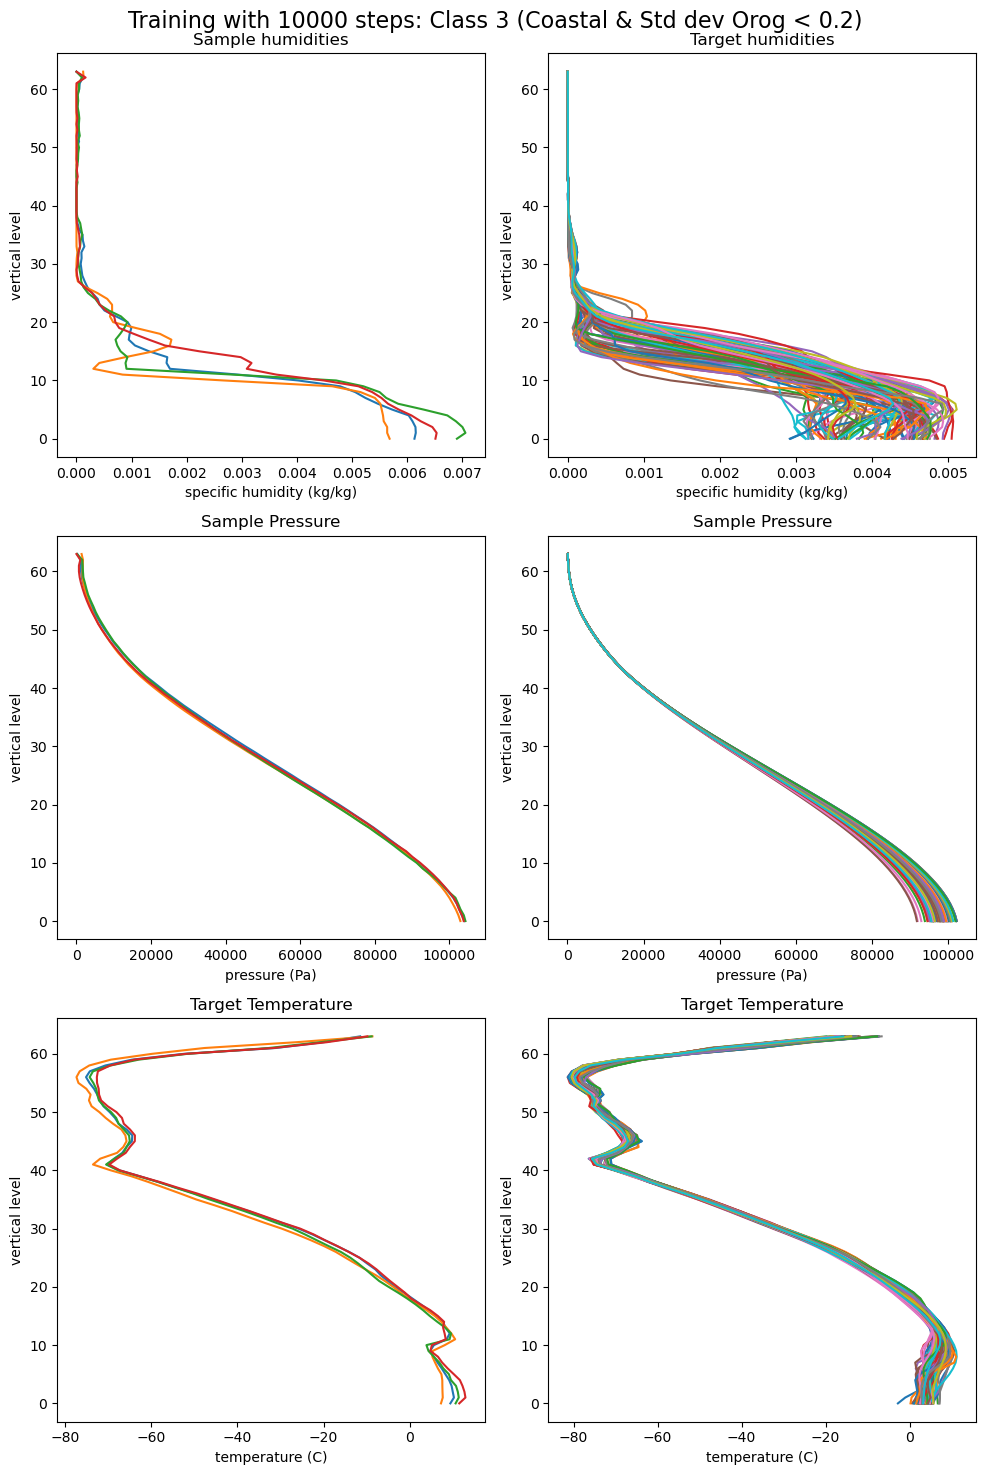

In [55]:

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

#Sample humidities plot
sample_humidity = samples[2, :, 0, :] * 0.025
for i in range(4):
    axs[0,0].plot(sample_humidity[i], np.arange(64))
axs[0,0].set_xlabel("specific humidity (kg/kg)")
axs[0,0].set_ylabel("vertical level")
axs[0,0].set_title("Sample humidities")


# Target humidities plot
target_humidity = trainingdata3[:144, 0, :] * 0.025
for i in range(100):
    axs[0,1].plot(target_humidity[i], np.arange(64))
axs[0,1].set_xlabel("specific humidity (kg/kg)")
axs[0,1].set_ylabel("vertical level")
axs[0,1].set_title("Target humidities")

#Sample pressure plot
sample_pressure = samples[2, :, 1, :] * 106000
for i in range(4):
    axs[1,0].plot(sample_pressure[i], np.arange(64))
axs[1,0].set_xlabel("pressure (Pa)")
axs[1,0].set_ylabel("vertical level")
axs[1,0].set_title("Sample Pressure")

# Target pressure plot
target_pressure = trainingdata3[:144, 1, :] * 106000
for i in range(100):
    axs[1,1].plot(target_pressure[i], np.arange(64))
axs[1,1].set_xlabel("pressure (Pa)")
axs[1,1].set_ylabel("vertical level")
axs[1,1].set_title("Sample Pressure")

#Sample temperature plot
sample_temperature = samples[2, :, 2, :]* 180 + 140 -273.15
for i in range(4):
    axs[2,0].plot(sample_temperature[i], np.arange(64))
axs[2,0].set_xlabel("temperature (C)")
axs[2,0].set_ylabel("vertical level")
axs[2,0].set_title("Target Temperature")

# Target pressure plot
target_temperature = trainingdata3[:144, 2, :]* 180 + 140 -273.15
for i in range(100):
    axs[2,1].plot(target_temperature[i], np.arange(64))
axs[2,1].set_xlabel("temperature (C)")
axs[2,1].set_ylabel("vertical level")
axs[2,1].set_title("Target Temperature")

fig.suptitle("Training with 10000 steps: Class 3 (Coastal & Std dev Orog < 0.2)", fontsize = 16)

plt.tight_layout()
plt.show()

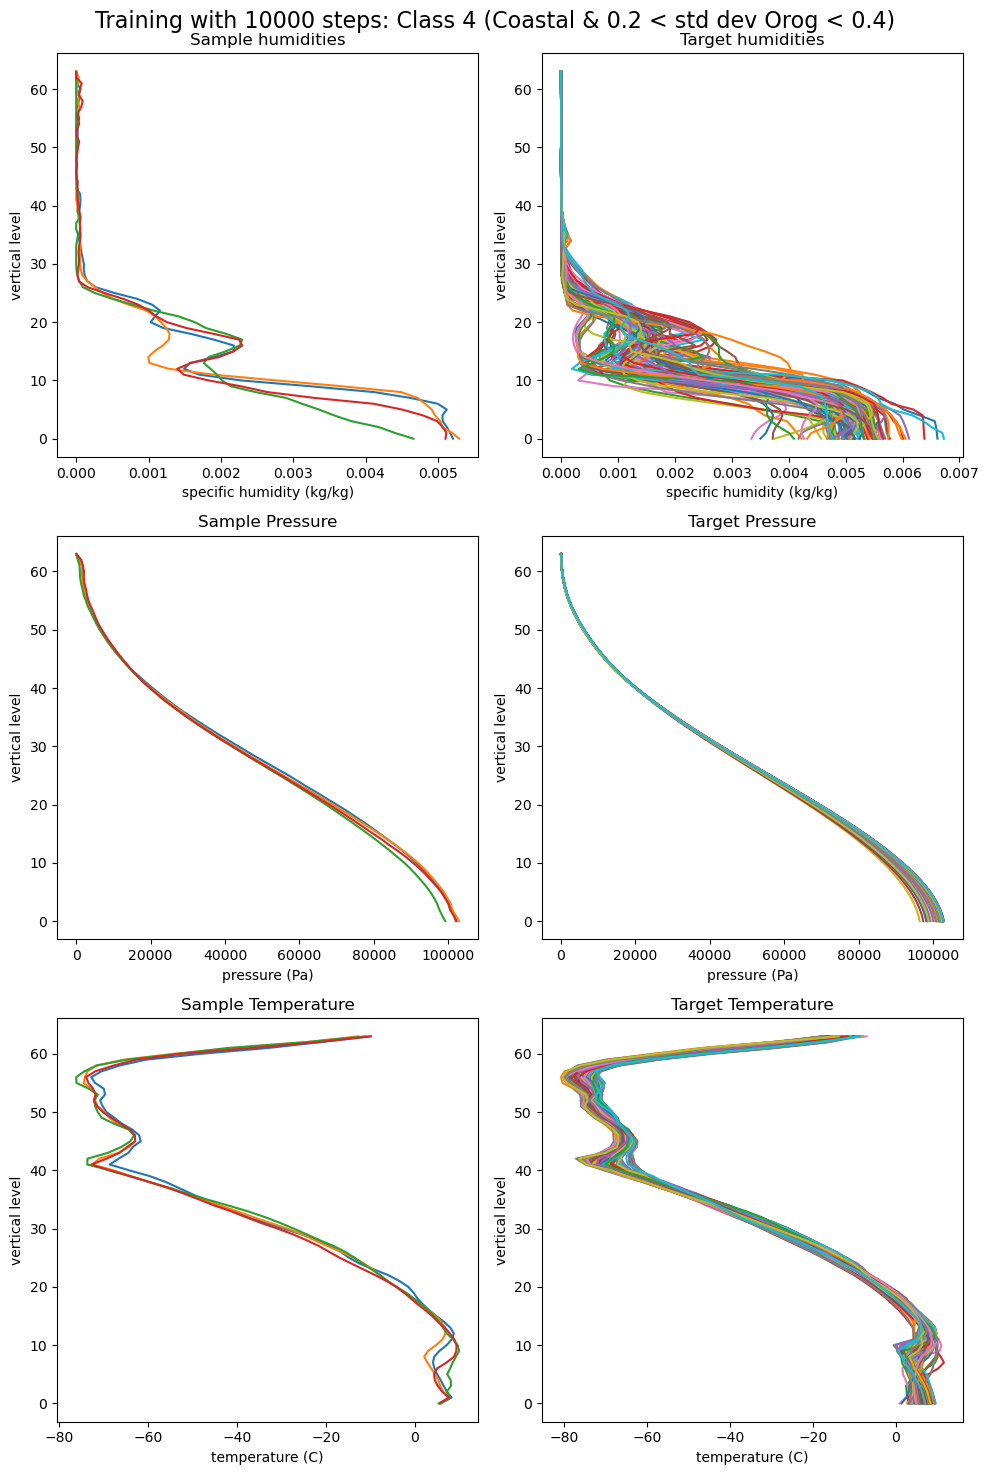

In [56]:

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

#Sample humidities plot
sample_humidity = samples[3, :, 0, :] * 0.025
for i in range(4):
    axs[0,0].plot(sample_humidity[i], np.arange(64))
axs[0,0].set_xlabel("specific humidity (kg/kg)")
axs[0,0].set_ylabel("vertical level")
axs[0,0].set_title("Sample humidities")


# Target humidities plot
target_humidity = trainingdata4[:144, 0, :] * 0.025
for i in range(100):
    axs[0,1].plot(target_humidity[i], np.arange(64))
axs[0,1].set_xlabel("specific humidity (kg/kg)")
axs[0,1].set_ylabel("vertical level")
axs[0,1].set_title("Target humidities")

#Sample pressure plot
sample_pressure = samples[3, :, 1, :] * 106000
for i in range(4):
    axs[1,0].plot(sample_pressure[i], np.arange(64))
axs[1,0].set_xlabel("pressure (Pa)")
axs[1,0].set_ylabel("vertical level")
axs[1,0].set_title("Sample Pressure")

# Target pressure plot
target_pressure = trainingdata4[:144, 1, :] * 106000
for i in range(100):
    axs[1,1].plot(target_pressure[i], np.arange(64))
axs[1,1].set_xlabel("pressure (Pa)")
axs[1,1].set_ylabel("vertical level")
axs[1,1].set_title("Target Pressure")

#Sample temperature plot
sample_temperature = samples[3, :, 2, :]* 180 + 140 -273.15
for i in range(4):
    axs[2,0].plot(sample_temperature[i], np.arange(64))
axs[2,0].set_xlabel("temperature (C)")
axs[2,0].set_ylabel("vertical level")
axs[2,0].set_title("Sample Temperature")

# Target pressure plotc
target_temperature = trainingdata4[:144, 2, :]* 180 + 140 -273.15
for i in range(100):
    axs[2,1].plot(target_temperature[i], np.arange(64))
axs[2,1].set_xlabel("temperature (C)")
axs[2,1].set_ylabel("vertical level")
axs[2,1].set_title("Target Temperature")

fig.suptitle("Training with 10000 steps: Class 4 (Coastal & 0.2 < std dev Orog < 0.4)", fontsize = 16)

plt.tight_layout()
plt.show()

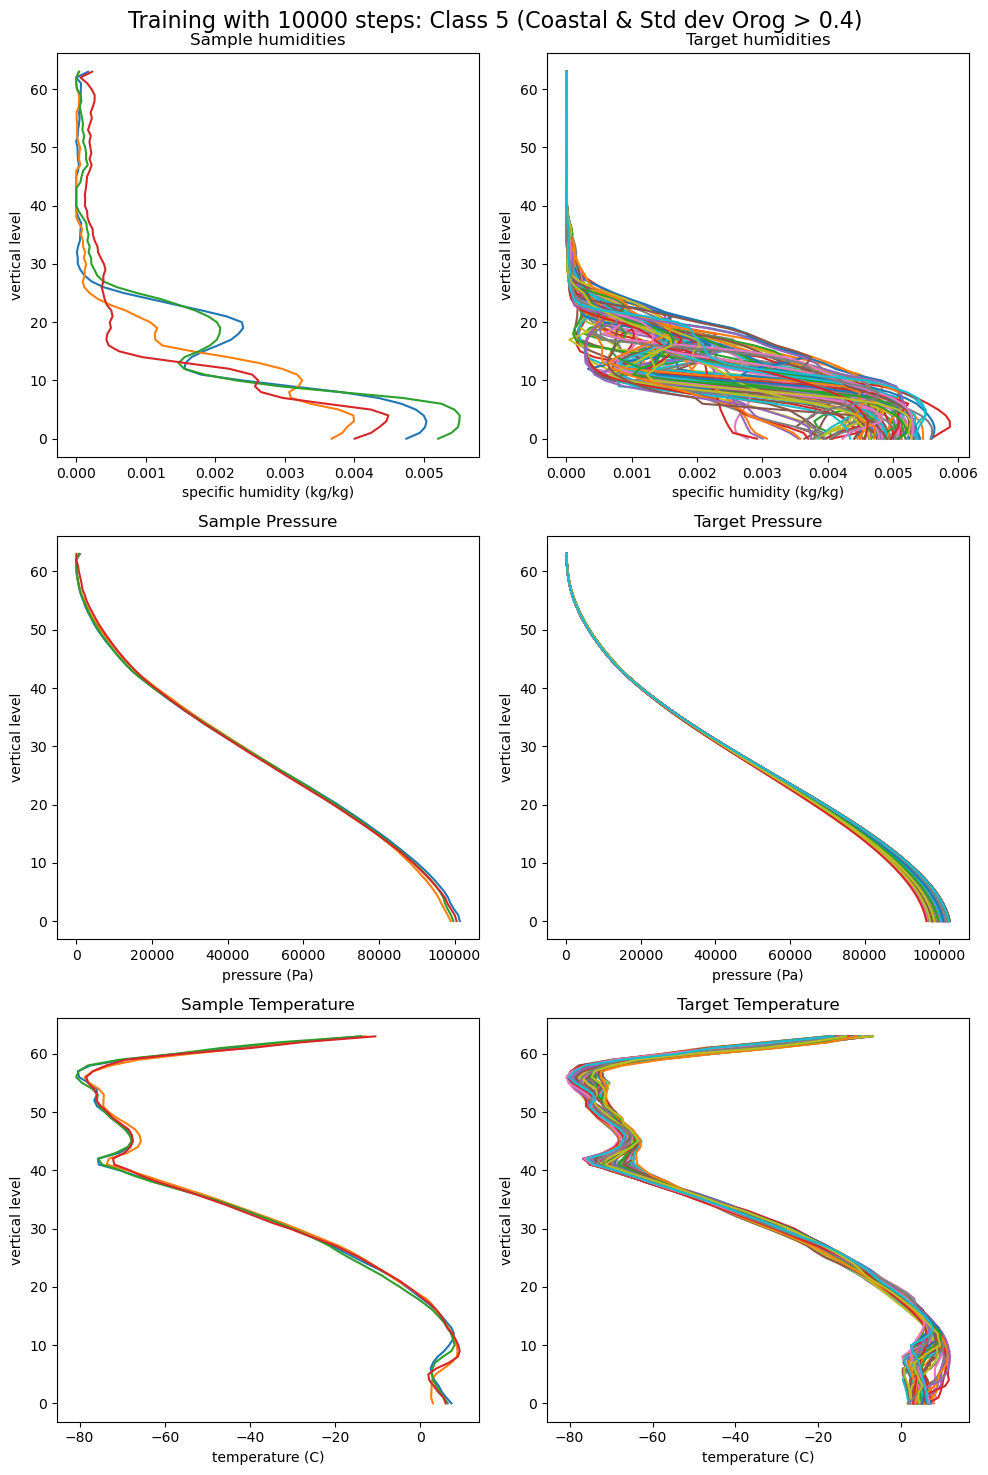

In [57]:

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

#Sample humidities plot
sample_humidity = samples[4, :, 0, :] * 0.025
for i in range(4):
    axs[0,0].plot(sample_humidity[i], np.arange(64))
axs[0,0].set_xlabel("specific humidity (kg/kg)")
axs[0,0].set_ylabel("vertical level")
axs[0,0].set_title("Sample humidities")


# Target humidities plot
target_humidity = trainingdata5[:144, 0, :] * 0.025
for i in range(100):
    axs[0,1].plot(target_humidity[i], np.arange(64))
axs[0,1].set_xlabel("specific humidity (kg/kg)")
axs[0,1].set_ylabel("vertical level")
axs[0,1].set_title("Target humidities")

#Sample pressure plot
sample_pressure = samples[4, :, 1, :] * 106000
for i in range(4):
    axs[1,0].plot(sample_pressure[i], np.arange(64))
axs[1,0].set_xlabel("pressure (Pa)")
axs[1,0].set_ylabel("vertical level")
axs[1,0].set_title("Sample Pressure")

# Target pressure plot
target_pressure = trainingdata5[:144, 1, :] * 106000
for i in range(100):
    axs[1,1].plot(target_pressure[i], np.arange(64))
axs[1,1].set_xlabel("pressure (Pa)")
axs[1,1].set_ylabel("vertical level")
axs[1,1].set_title("Target Pressure")

#Sample temperature plot
sample_temperature = samples[4, :, 2, :]* 180 + 140 -273.15
for i in range(4):
    axs[2,0].plot(sample_temperature[i], np.arange(64))
axs[2,0].set_xlabel("temperature (C)")
axs[2,0].set_ylabel("vertical level")
axs[2,0].set_title("Sample Temperature")

# Target pressure plot
target_temperature = trainingdata5[:144, 2, :]* 180 + 140 -273.15
for i in range(100):
    axs[2,1].plot(target_temperature[i], np.arange(64))
axs[2,1].set_xlabel("temperature (C)")
axs[2,1].set_ylabel("vertical level")
axs[2,1].set_title("Target Temperature")

fig.suptitle("Training with 10000 steps: Class 5 (Coastal & Std dev Orog > 0.4)", fontsize = 16)

plt.tight_layout()
plt.show()